In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [47]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [116]:
import numpy

In [48]:
import tensorflow

In [66]:
import random

In [62]:
import matplotlib.pyplot

In [49]:
traingen=ImageDataGenerator(rescale=1/255)

In [50]:
train=traingen.flow_from_directory(directory='/kaggle/input/apples-or-tomatoes-image-classification/train',
                                  batch_size=32,
                                  target_size=(224,224),
                                  class_mode='binary')

Found 294 images belonging to 2 classes.


In [51]:
val=traingen.flow_from_directory(directory='/kaggle/input/apples-or-tomatoes-image-classification/test',
                                  batch_size=32,
                                  target_size=(224,224),
                                  class_mode='binary')

Found 97 images belonging to 2 classes.


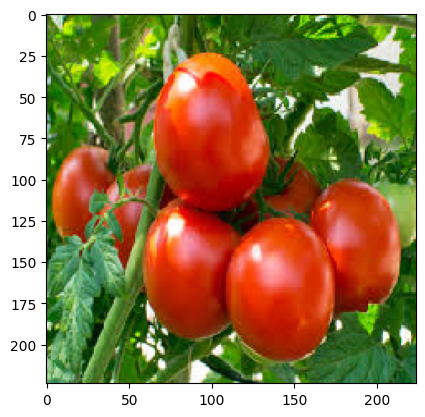

In [78]:
dev,harsh=matplotlib.pyplot.subplots()
harsh.imshow(train[0][0][random.randint(0,50)])

In [60]:
train[0][0][0]

array([[[0.53333336, 0.627451  , 0.5019608 ],
        [0.53333336, 0.627451  , 0.5019608 ],
        [0.5372549 , 0.6313726 , 0.49803925],
        ...,
        [0.6666667 , 0.7686275 , 0.62352943],
        [0.61960787, 0.72156864, 0.5764706 ],
        [0.61960787, 0.72156864, 0.5764706 ]],

       [[0.53333336, 0.627451  , 0.5019608 ],
        [0.53333336, 0.627451  , 0.5019608 ],
        [0.5372549 , 0.6313726 , 0.49803925],
        ...,
        [0.6666667 , 0.7686275 , 0.62352943],
        [0.61960787, 0.72156864, 0.5764706 ],
        [0.61960787, 0.72156864, 0.5764706 ]],

       [[0.6117647 , 0.7058824 , 0.5803922 ],
        [0.6117647 , 0.7058824 , 0.5803922 ],
        [0.59607846, 0.6901961 , 0.5568628 ],
        ...,
        [0.654902  , 0.7568628 , 0.6117647 ],
        [0.6313726 , 0.73333335, 0.5882353 ],
        [0.6313726 , 0.73333335, 0.5882353 ]],

       ...,

       [[0.07450981, 0.10588236, 0.02352941],
        [0.07450981, 0.10588236, 0.02352941],
        [0.08235294, 0

In [79]:
base_model=tensorflow.keras.applications.VGG16(include_top=False)

In [80]:
base_model.trainable=False

In [81]:
for i in base_model.layers:
    print(i,i.trainable)

<InputLayer name=input_layer_10, built=True> False
<Conv2D name=block1_conv1, built=True> False
<Conv2D name=block1_conv2, built=True> False
<MaxPooling2D name=block1_pool, built=True> False
<Conv2D name=block2_conv1, built=True> False
<Conv2D name=block2_conv2, built=True> False
<MaxPooling2D name=block2_pool, built=True> False
<Conv2D name=block3_conv1, built=True> False
<Conv2D name=block3_conv2, built=True> False
<Conv2D name=block3_conv3, built=True> False
<MaxPooling2D name=block3_pool, built=True> False
<Conv2D name=block4_conv1, built=True> False
<Conv2D name=block4_conv2, built=True> False
<Conv2D name=block4_conv3, built=True> False
<MaxPooling2D name=block4_pool, built=True> False
<Conv2D name=block5_conv1, built=True> False
<Conv2D name=block5_conv2, built=True> False
<Conv2D name=block5_conv3, built=True> False
<MaxPooling2D name=block5_pool, built=True> False


In [82]:
input=tensorflow.keras.layers.Input(shape=(224,224,3))
x=base_model(input)
x=tensorflow.keras.layers.Flatten()(x)
output=tensorflow.keras.layers.Dense(1,activation='sigmoid')(x)

In [83]:
model1=tensorflow.keras.Model(input,output)

In [84]:
model1.compile(optimizer=tensorflow.keras.optimizers.Adam(),
              loss=tensorflow.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [85]:
history=model1.fit(train,epochs=5,validation_data=val)

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 362ms/step - accuracy: 0.6224 - loss: 0.7862 - val_accuracy: 0.8144 - val_loss: 0.4519
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.8205 - loss: 0.3836 - val_accuracy: 0.7938 - val_loss: 0.4703
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 163ms/step - accuracy: 0.8956 - loss: 0.2770 - val_accuracy: 0.8557 - val_loss: 0.3499
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9716 - loss: 0.1361 - val_accuracy: 0.8660 - val_loss: 0.3364
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step - accuracy: 0.9850 - loss: 0.0981 - val_accuracy: 0.8454 - val_loss: 0.3382


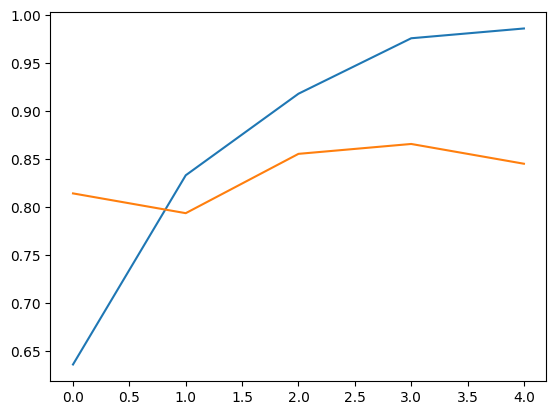

In [91]:
dev,harsh=matplotlib.pyplot.subplots()
harsh.plot(history.history['accuracy'])
harsh.plot(history.history['val_accuracy'])

In [92]:
len(base_model.layers)

19

In [93]:
for i in range(14,19):
    base_model.layers[i].trainable=True

In [94]:
for i in base_model.layers:
    print(i,i.trainable)

<InputLayer name=input_layer_10, built=True> False
<Conv2D name=block1_conv1, built=True> False
<Conv2D name=block1_conv2, built=True> False
<MaxPooling2D name=block1_pool, built=True> False
<Conv2D name=block2_conv1, built=True> False
<Conv2D name=block2_conv2, built=True> False
<MaxPooling2D name=block2_pool, built=True> False
<Conv2D name=block3_conv1, built=True> False
<Conv2D name=block3_conv2, built=True> False
<Conv2D name=block3_conv3, built=True> False
<MaxPooling2D name=block3_pool, built=True> False
<Conv2D name=block4_conv1, built=True> False
<Conv2D name=block4_conv2, built=True> False
<Conv2D name=block4_conv3, built=True> False
<MaxPooling2D name=block4_pool, built=True> True
<Conv2D name=block5_conv1, built=True> True
<Conv2D name=block5_conv2, built=True> True
<Conv2D name=block5_conv3, built=True> True
<MaxPooling2D name=block5_pool, built=True> True


In [95]:
model1.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tensorflow.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [109]:
history2=model1.fit(train,epochs=20,validation_data=val,initial_epoch=history.epoch[-1])

Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 1.0000 - loss: 5.5477e-05 - val_accuracy: 0.8763 - val_loss: 0.6127
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 1.0000 - loss: 5.4389e-05 - val_accuracy: 0.8763 - val_loss: 0.6154
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 1.0000 - loss: 4.7755e-05 - val_accuracy: 0.8763 - val_loss: 0.6180
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 1.0000 - loss: 4.4263e-05 - val_accuracy: 0.8763 - val_loss: 0.6208
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 1.0000 - loss: 5.0351e-05 - val_accuracy: 0.8763 - val_loss: 0.6237
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 196ms/step - accuracy: 1.0000 - loss: 3.7250e-05 - val_accuracy: 0.8763 - val_loss: 0.6260
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - accuracy: 1.0000 - loss: 3.7203e-05 - val_accuracy: 0.8763 - val_loss: 0.6294
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 1.0000 - 

In [110]:
print(history2.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


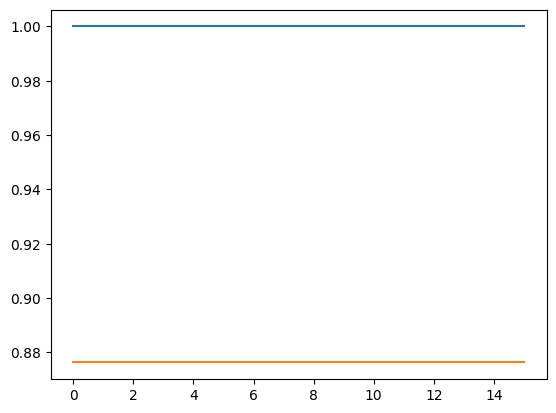

In [112]:
dev,harsh=matplotlib.pyplot.subplots()
harsh.plot(history2.history['accuracy'])
harsh.plot(history2.history['val_accuracy'])
matplotlib.pyplot.show()

In [121]:
lt=['apple','tomato']

In [126]:
image_path = '/kaggle/input/apples-or-tomatoes-image-classification/test/apples/img_p1_139.jpeg'

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

image = load_img(image_path, target_size=(224,224))
image_array = img_to_array(image)
image_array = image_array / 255.0
image_array = numpy.expand_dims(image_array, axis=0)
predictions = model1.predict(image_array)
data = numpy.array(predictions)
data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[3.9933593e-10]], dtype=float32)

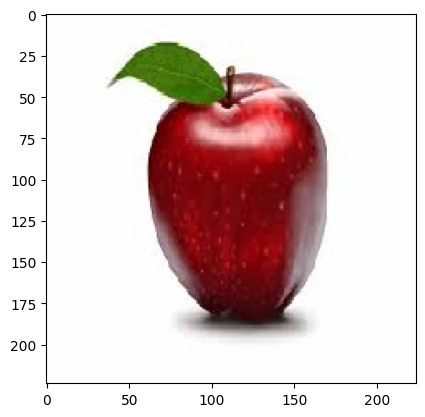

In [127]:
fig,ax=matplotlib.pyplot.matplotlib.pyplot.subplots()
ax.imshow(image_array[0])

In [128]:
predicted_class_index = numpy.argmax(data)
predicted_class_probability = data[0][predicted_class_index]
predicted_class_label = lt[predicted_class_index]
print(predicted_class_index)
print(f"Predicted class label: {predicted_class_label}")
print(f"Predicted class probability: {predicted_class_probability}")

0
Predicted class label: apple
Predicted class probability: 3.9933592543839325e-10
